# Relatório - Aula 14

## $\pi$ Pelo Método de Monte Carlo

---

### Pedro Toledo Piza Civita - pedrotpc@al.insper.edu.br

## Análise dos Resultados de Desempenho e Estimativa

Ao rodar o algoritmo de Monte Carlo com \( N = 10.000.000 \), os resultados das três versões (sequencial, paralela inicial e paralela otimizada) foram os seguintes:

### Parte 1: Implementação Sequencial
- **Valor estimado de $\pi$:** 3.14132
- **Tempo de execução:** 0.211699 segundos

A versão sequencial é a mais rápida, o que é esperado, dado que não há overhead de gerenciamento de threads ou problemas de sincronização. A geração de números aleatórios ocorre de maneira consistente e eficiente, mantendo a precisão da estimativa.

### Parte 2: Primeira Tentativa de Paralelização
- **Valor estimado de $\pi$:** 3.14257
- **Tempo de execução:** 1.44928 segundos

Surpreendentemente, a versão paralela inicial apresentou um tempo de execução significativamente maior do que a versão sequencial. Esse aumento no tempo de execução se deve ao fato de que, em C++, a geração de números aleatórios dentro de loops paralelos pode enfrentar problemas de eficiência. As seeds dos geradores de números aleatórios em threads paralelas podem acabar sincronizando os valores gerados ou criando conflitos, tornando o algoritmo menos eficiente e introduzindo overhead. Esse comportamento de sincronização pode ter aumentado o tempo de execução, mesmo com o benefício teórico do paralelismo.

### Parte 3: Paralelização Otimizada
- **Valor estimado de $\pi$:** 3.14126
- **Tempo de execução:** 0.470134 segundos

Na terceira tentativa, a otimização foi feita fornecendo a cada thread seu próprio gerador de números aleatórios, com seeds diferentes para garantir independência entre os valores gerados. Isso removeu o problema de sincronização na geração de números aleatórios e reduziu o overhead. Como resultado, o tempo de execução foi significativamente melhor do que a primeira versão paralela, embora ainda mais lento que a versão sequencial.

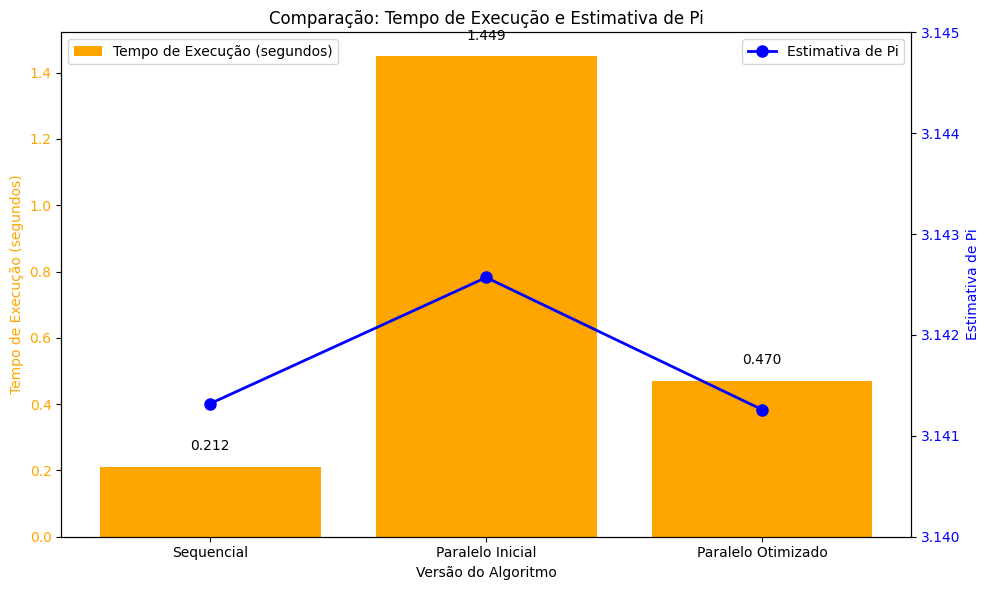

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
versions = ['Sequencial', 'Paralelo Inicial', 'Paralelo Otimizado']
pi_values = [3.14132, 3.14257, 3.14126]
times = [0.211699, 1.44928, 0.470134]

# Configuração dos gráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barra - tempo de execução (destacar as diferenças de tempo)
ax1.bar(versions, times, color='orange', label='Tempo de Execução (segundos)')
ax1.set_xlabel('Versão do Algoritmo')
ax1.set_ylabel('Tempo de Execução (segundos)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_title('Comparação: Tempo de Execução e Estimativa de Pi')

# Adiciona os valores das barras para melhor visualização
for i, v in enumerate(times):
    ax1.text(i, v + 0.05, f'{v:.3f}', ha='center', color='black')

# Gráfico de linha para estimativa de Pi (melhor visualização de pequenas diferenças)
ax2 = ax1.twinx()
ax2.plot(versions, pi_values, color='blue', marker='o', label='Estimativa de Pi', linewidth=2, markersize=8)
ax2.set_ylabel('Estimativa de Pi', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(3.14, 3.145)  # Zoom para evidenciar as pequenas diferenças

# Adicionar legendas
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibição
plt.show()


### Observações
A diferença de desempenho entre a versão sequencial e as versões paralelas reflete o desafio de gerenciar a geração de números aleatórios em um ambiente paralelo. O uso de seeds não independentes na primeira tentativa de paralelização introduziu conflitos e reduziu a eficiência. Ao corrigir isso com a atribuição de seeds exclusivos para cada thread, a paralelização ficou mais eficiente. No entanto, o overhead adicional de gerenciamento de threads ainda impacta o desempenho em comparação com a versão sequencial.

Esses resultados mostram que, embora o paralelismo possa teoricamente aumentar a velocidade em problemas altamente independentes, a implementação prática requer cuidados na geração de números aleatórios e na gestão de threads para evitar que o desempenho seja reduzido por problemas de sincronização e overhead.